<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/ClassDemo/linefitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv", header=None,  names=["population", "wspeed", "city"])

In [3]:
df

,population,wspeed,city
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


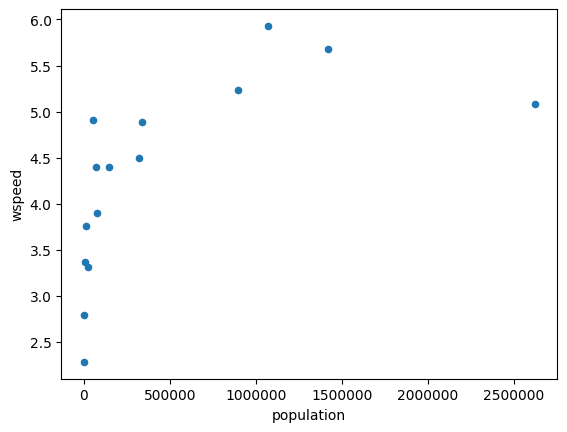

In [4]:
ax = df.plot("population", "wspeed", kind="scatter")

ax.ticklabel_format(style="plain")

In [5]:
import numpy as np

In [6]:
df["population"] = np.log10(df["population"])

Text(0.5, 0, 'log10 population')

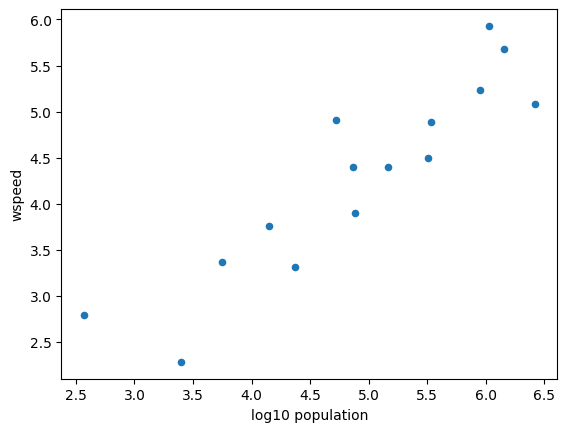

In [7]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("log10 population")

Text(0.5, 0, 'log10 population')

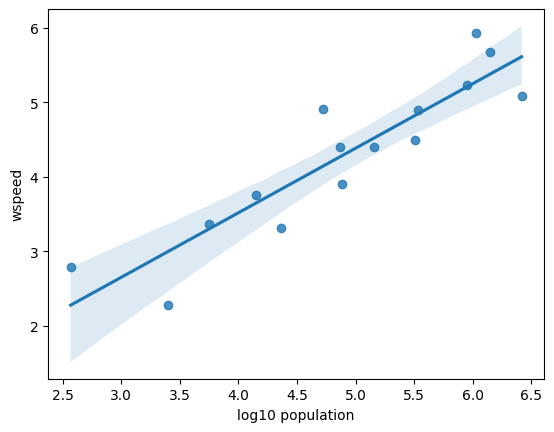

In [8]:
import seaborn as sns
ax = sns.regplot(x=df["population"], y=df["wspeed"])
ax.set_xlabel("log10 population")

In [9]:
def line(x, slope, intercept):
  y = slope * x + intercept
  return y

def SSE(y, ypred):
  return ((y - ypred)**2).sum()

In [10]:
current_min_sse = 1e7
for slope in np.arange(0, 3, 0.01):
    for intercept in np.arange(0, 3, 0.01):
        prediction = line(df["population"], slope, intercept)
        sse = SSE(df["wspeed"], prediction)

        if sse < current_min_sse:
            current_min_sse = sse
            manual_slope = slope
            manual_intercept = intercept

print(f"Best Slope: {manual_slope:.2f}")
print(f"Best Intercept: {manual_intercept:.2f}")

Best Slope: 0.87
Best Intercept: 0.03


In [11]:
df["prediction_manual"] = line(df["population"], manual_slope, manual_intercept)

In [12]:
manual_min_sse = SSE(df["wspeed"], df["prediction_manual"])
print(f"Minimum Sum of Squared Errors achieved: {manual_min_sse: 2f}")

Minimum Sum of Squared Errors achieved:  2.758743


Text(0, 0.5, 'Walking Speed (ft/s)')

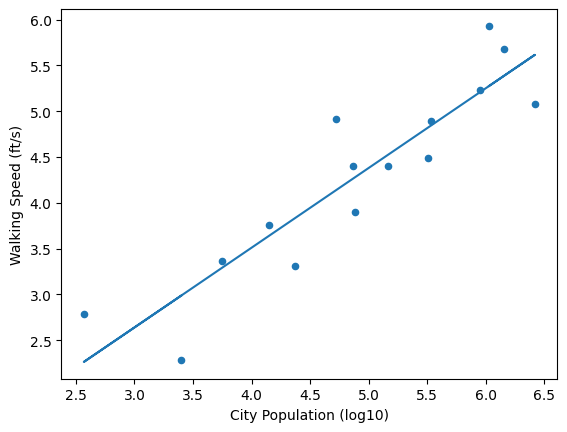

In [13]:
ax = df.plot("population", "wspeed", kind = "scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [14]:
numpy_slope, numpy_intercept = np.polyfit(df["population"], df["wspeed"], 1)

print(f"Numpy Slope: {numpy_slope:.3f}")
print(f"Numpy Slope: {numpy_intercept: .3f}")

Numpy Slope: 0.865
Numpy Slope:  0.057


Text(0, 0.5, 'Walking Speed (ft/s)')

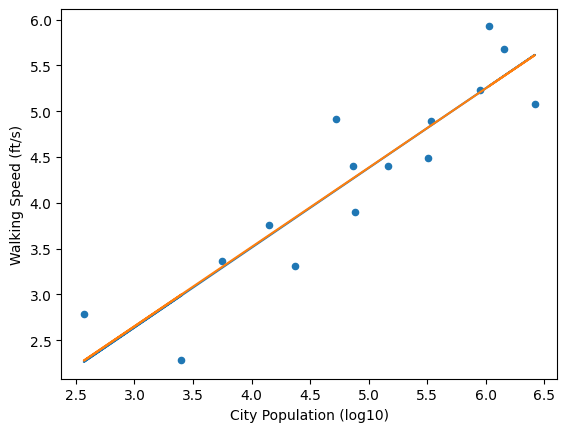

In [15]:
df["prediction_numpy"] = line(df["population"], numpy_slope, numpy_intercept)
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#reg.fit(df["population"],df["wspeed"])

In [20]:
reg.fit(df["population"].values.reshape(-1, 1), df["wspeed"])

LinearRegression()

In [22]:
reg.coef_

array([0.8653381])

In [23]:
reg.intercept_

0.05664889151453334

Text(0, 0.5, 'Walking Speed (ft/s)')

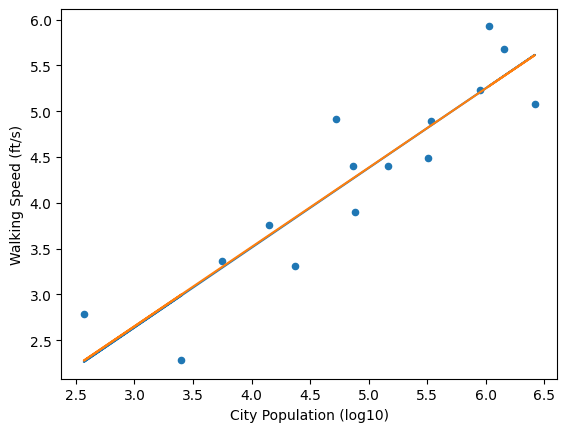

In [21]:
df["prediction_sklearn"] = reg.predict(df["population"].values.reshape(-1,1))
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")


In [16]:
from sklearn.linear_model import LinearRegression

ref = LinearRegression().fit(df["population"], df["wspeed"])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
reg.intercept_

In [ ]:
reg = LinearRegression().fit(df["population"].values.reshape(-1, 1), df["wspeed"].values)

In [ ]:
score = reg.score(df["population"].values.reshape(-1, 1), df["wspeed"].values)
print(f"Score of linear regression from sklearn: {score: .2f}")

In [ ]:
df["prediction_sklearn"] = reg.predict(df["population"].values.reshape(-1, 1))

In [ ]:
ax = df.plot("population", "wspeed", kind = "scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.set_ylabel("Walking Speed (ft/s)")

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed(ft/s)")